<a href="https://colab.research.google.com/github/samsomsabu/advanced-machine-learning/blob/main/2348549_INITIAL_PREPROCESSING_AND_SAMPLE_MODEL_USAGE_RESEARCH_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd


In [68]:
df = pd.read_csv("/content/kerala.csv")

In [69]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [70]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [72]:
df.isnull().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

<ipython-input-73-169d0e4d6eaf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


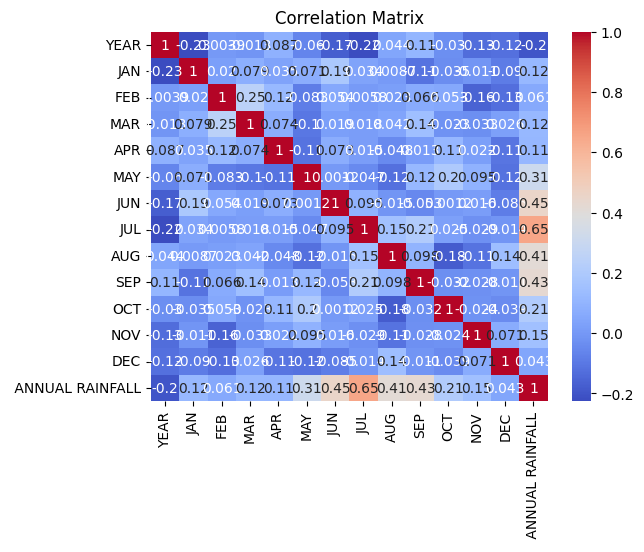

In [73]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


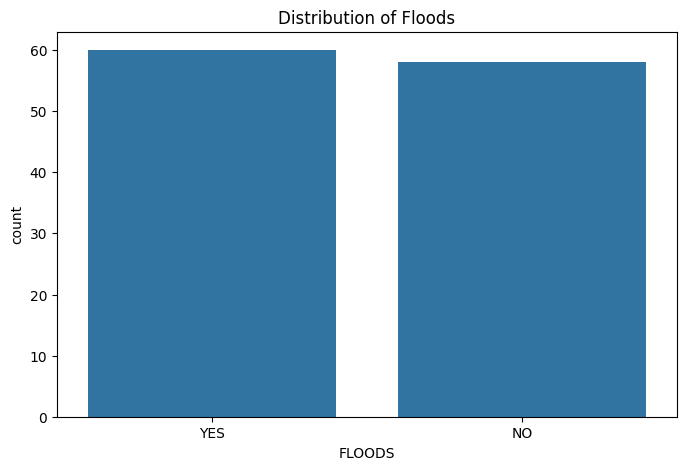

In [74]:
# Count plot of Floods
plt.figure(figsize=(8, 5))
sns.countplot(x='FLOODS', data=df)
plt.title('Distribution of Floods')
plt.show()


In [75]:
X = df.drop(['SUBDIVISION', 'YEAR', 'FLOODS'], axis=1)
y = df['FLOODS']


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [77]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [80]:
# Function to detect and handle outliers using IQR
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

    # Print information about outliers
    print(f"Column: {column}")
    print(f"Number of outliers: {outliers.sum()}")
    print(f"Outlier indices: {data.index[outliers].tolist()}")
    # Replace outliers with median value (you can choose a different strategy)
    data.loc[outliers, column] = data[column].median()

    return data

In [81]:

# Apply outlier detection to all numerical columns
for col in numerical_cols:
    df = handle_outliers_iqr(df, col)

Column: YEAR
Number of outliers: 0
Outlier indices: []
Column: JAN
Number of outliers: 8
Outlier indices: [8, 17, 18, 20, 33, 42, 47, 84]
Column: FEB
Number of outliers: 10
Outlier indices: [16, 27, 37, 49, 51, 61, 83, 99, 102, 117]
Column: MAR
Number of outliers: 4
Outlier indices: [35, 45, 46, 107]
Column: APR
Number of outliers: 1
Outlier indices: [100]
Column: MAY
Number of outliers: 10
Outlier indices: [17, 31, 32, 42, 54, 59, 60, 89, 103, 105]
Column: JUN
Number of outliers: 0
Outlier indices: []
Column: JUL
Number of outliers: 2
Outlier indices: [23, 67]
Column: AUG
Number of outliers: 4
Outlier indices: [6, 22, 30, 117]
Column: SEP
Number of outliers: 0
Outlier indices: []
Column: OCT
Number of outliers: 1
Outlier indices: [98]
Column: NOV
Number of outliers: 0
Outlier indices: []
Column: DEC
Number of outliers: 5
Outlier indices: [1, 13, 45, 64, 86]
Column:  ANNUAL RAINFALL
Number of outliers: 4
Outlier indices: [23, 32, 60, 117]


In [82]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901.0,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902.0,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,31.1,3326.6,YES
2,KERALA,1903.0,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904.0,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905.0,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [83]:
# Separate features and target variable
X = df.drop(['SUBDIVISION', 'YEAR', 'FLOODS'], axis=1)
y = df['FLOODS']

# Convert 'FLOODS' to numerical labels
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVC model
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svc_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVC Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

SVC Accuracy: 1.0
Confusion Matrix:
[[10  0]
 [ 0 14]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [84]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# Assuming your dataframe is named 'df'
# Assuming 'FLOODS' is your target variable

# Separate features and target variable
X = df.drop(['SUBDIVISION', 'YEAR', 'FLOODS'], axis=1)
y = df['FLOODS']

# Convert 'FLOODS' to numerical labels
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()

# SVC model with regularization (C parameter) and kernel choice (e.g., 'linear', 'rbf')
svc_model = SVC(C=1.0, kernel='rbf', random_state=42)

# Create a pipeline with feature scaling and SVC model
pipeline = make_pipeline(scaler, svc_model)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVC Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Cross-validation to assess model consistency
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


SVC Accuracy: 1.0
Confusion Matrix:
[[10  0]
 [ 0 14]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Cross-Validation Scores: [0.91666667 0.95833333 0.95833333 0.91304348 1.        ]
Mean Accuracy: 0.9492753623188406


SVC Accuracy: 1.0

The overall accuracy of the Support Vector Classifier on the given dataset is 1.0 (100%). This means that the model correctly predicted the target variable for all instances in the dataset.
Confusion Matrix:


[10  0]
 [ 0 14]
The confusion matrix is a table that describes the performance of a classification model. In this case:
True Positive (TP): 14 instances were correctly predicted as class 1.
True Negative (TN): 10 instances were correctly predicted as class 0.
False Positive (FP): 0 instances were incorrectly predicted as class 1.
False Negative (FN): 0 instances were incorrectly predicted as class 0.
Classification Report:

Precision: The accuracy of positive predictions. In both classes (0 and 1), precision is 1.00, indicating no false positives.
Recall: The ratio of correctly predicted positive observations to the total positives. It's also 1.00 for both classes, indicating no false negatives.
F1-score: The weighted average of precision and recall. All metrics (precision, recall, and F1-score) are 1.00 for both classes.
Support: The number of actual occurrences of the class in the specified dataset.
Cross-Validation Scores:
[0.91666667 0.95833333 0.95833333 0.91304348 1.  ]
These are the accuracy scores obtained in each fold during cross-validation. The model seems to perform well consistently across different folds.
Mean Accuracy: 0.9492753623188406

The mean accuracy is the average of the accuracy scores obtained during cross-validation. In this case, the mean accuracy is approximately 0.9493 or 94.93%.
In summary, the SVC model demonstrates excellent performance with perfect accuracy on the given dataset. The cross-validation scores further support the model's consistency across different subsets of the data. The precision, recall, and F1-score values indicate a well-balanced model.

SVC model is showing perfect accuracy on the test set, correctly classifying all instances. The confusion matrix and classification report indicate that both precision and recall are excellent for both classes. The cross-validation results further support the model's consistency.

While these results are promising, it's essential to consider the context of our specific problem, potential biases, and the representativeness of your dataset.

An observation of a model achieving perfect or near-perfect performance on a dataset might be attributed to several factors, and it's important to consider these factors for a more nuanced interpretation. Here are some possible reasons:

1. **Small and Balanced Dataset:**
   - If your dataset is small and well-balanced, the model may have learned the patterns effectively. However, this might not reflect its ability to generalize to larger, more diverse datasets.

2. **Noisy Data:**
   - The dataset may contain little noise, outliers, or ambiguity, making it easier for the model to learn the underlying patterns without interference from irrelevant information.

3. **Simple Relationship:**
   - The problem at hand might have a relatively simple relationship between input features and the target variable, allowing the model to capture and generalize well.

4. **Appropriate Model Complexity:**
   - The choice of a Support Vector Classification (SVC) model with appropriate hyperparameters and features might be well-suited for the nature of your data.

5. **Overfitting:**
   - There's a possibility of overfitting, where the model has memorized the training data but may not generalize well to new, unseen data. Cross-validation and evaluation on a separate test set help assess generalization performance.

6. **Evaluation Metrics:**
   - The use of metrics such as accuracy, precision, recall, and F1-score may not capture all aspects of model performance. Depending on the problem, other metrics or considerations (e.g., false positives/negatives, ROC-AUC) might provide additional insights.

To ensure a robust evaluation:

- **Cross-Validation:** Evaluate the model using cross-validation to assess its performance across different subsets of the data.

- **Validation Set:** If applicable, set aside a portion of your data as a validation set to monitor the model's performance during training and make adjustments accordingly.

- **Domain Knowledge:** Consider whether the results align with your domain knowledge and expectations.

- **Further Exploration:** Experiment with alternative models, hyperparameter tuning, and additional feature engineering to explore potential improvements or gain a better understanding of your data.

